# Explore here

In [33]:
import pandas as pd

data_bank = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep= ';')
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [35]:
#month, day_of_week, duration, pdays, education fuera
if data_bank.duplicated().sum():
    data_bank = data_bank.drop_duplicates()
print(data_bank.shape)
data_bank.head(40)

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
filt_data = data_bank.drop(['contact', 'month', 'duration', 'day_of_week'], axis=1)
filt_data.info()
#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, 

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   campaign        41176 non-null  int64  
 8   pdays           41176 non-null  int64  
 9   previous        41176 non-null  int64  
 10  poutcome        41176 non-null  object 
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nr.employed     41176 non-null  float64
 16  y               41176 non-null  object 
dtypes: float64(5), int64(4), object(8)
m

In [37]:
if filt_data.duplicated().sum():
    filt_data = filt_data.drop_duplicates()
print(filt_data.shape)
filt_data.head()

(38765, 17)


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


/tmp/ipykernel_516/804065676.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


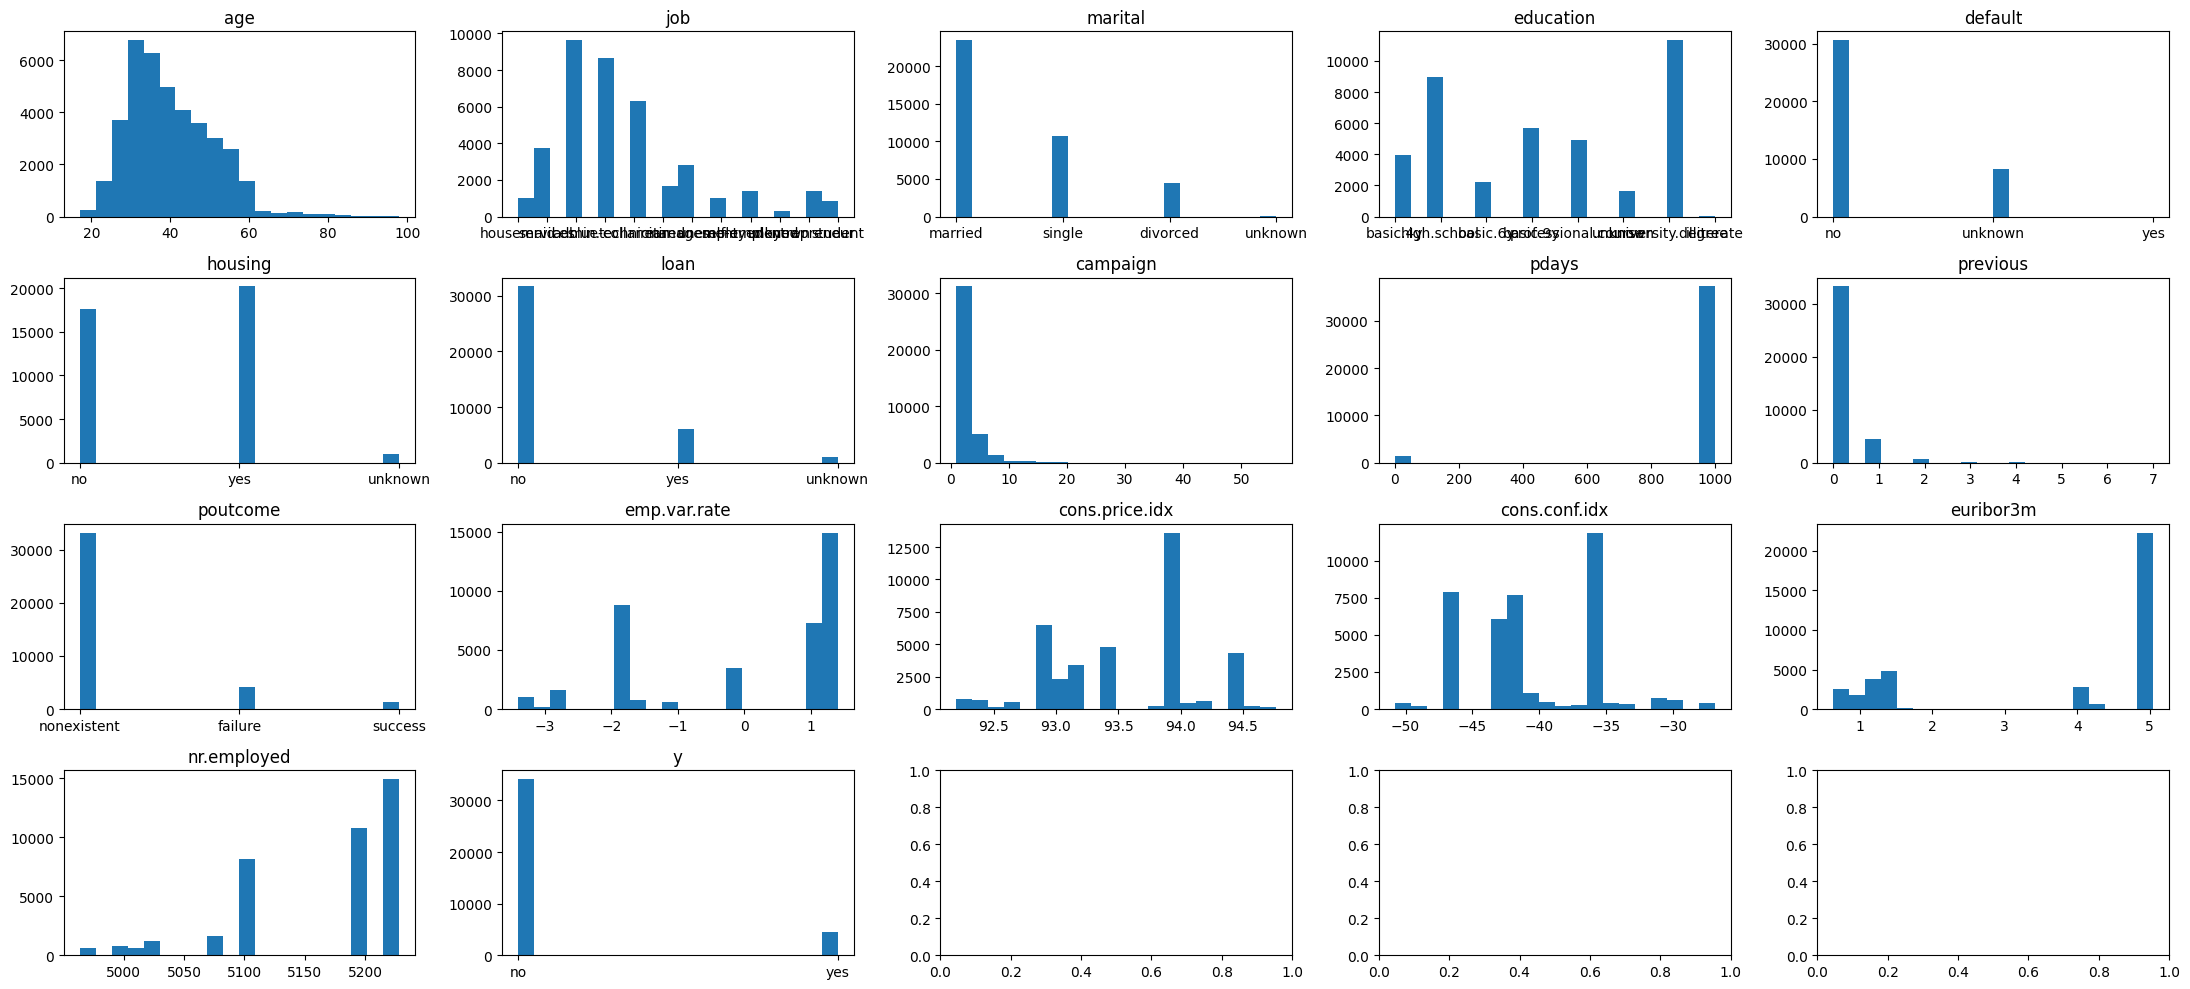

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, 

# fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# columns_to_plot = numericas.columns
# print(columns_to_plot)

# # Iterar sobre las columnas y crear los boxplots
# for i, column in enumerate(columns_to_plot):

#     sns.boxplot(ax=axes[i // 3, i % 3], data=clean_df, x=column)

# fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# columns_to_plot = numericas.columns
# print(columns_to_plot)

# # Iterar sobre las columnas y crear los boxplots
# for i, column in enumerate(columns_to_plot):

#     sns.boxplot(ax=axes[i // 3, i % 3], data=clean_df, x=column)

nrows = 4
ncols = 5

fig, axis = plt.subplots(ncols= ncols, nrows= nrows, figsize= (22, 10), constrained_layout=True)

for n, col in enumerate(filt_data.columns):
    row = n // ncols
    col_id = n % ncols
    axis[row, col_id].hist(filt_data[col], bins= 20)
    axis[row, col_id].set_title(col)
    
    
plt.tight_layout()
plt.show()


In [ ]:
fig, axis = plt.subplot_mosaic([['a','b'],['c','c']],figsize = (10, 10))

# Create a multiple histogram
sns.histplot(ax=axis['a'],  data = categoricas, x = "neighbourhood_group") 
sns.histplot(ax= axis['b'],  data = categoricas, x = "room_type") 
sns.histplot(ax= axis['c'],  data = neighbourhood_order, x = "neighbourhood",binrange=(0,40)) 

In [ ]:
fig, axis = plt.subplot_mosaic([['a1','b1'],
                                ['a2','b2']], figsize = (12, 10))


sns.scatterplot(x='longitude', y='latitude', data=clean_df, ax= axis['a1'])
sns.scatterplot(x='longitude', y='latitude', data=clean_df, ax= axis['a2'], hue= 'neighbourhood_group')
sns.scatterplot(x='longitude', y='latitude', hue='price', data=precio_ordenado, ax=axis['b1'])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()